In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

#Import time module
import time

# Import linregress
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

# Basic url for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yulara
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | san rafael
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | soyo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hayden
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | pitimbu
Processing Re

Processing Record 39 of Set 4 | kamenka
Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | ketchikan
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | amudat
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | salinas
Processing Record 47 of Set 4 | brae
Processing Record 48 of Set 4 | mar del plata
Processing Record 49 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 50 of Set 4 | ko samui
Processing Record 1 of Set 5 | rudnogorsk
Processing Record 2 of Set 5 | silver city
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | kikwit
Processing Record 8 of Set 5 | vila do maio
Processing Record 9 of Set 5 | tiarei
Processing Record 10 of Set 5 | carnarvon
Processing Record 11 of Set 5 | b

Processing Record 28 of Set 8 | usinsk
Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | tahta
Processing Record 31 of Set 8 | saint-medard-en-jalles
Processing Record 32 of Set 8 | portobelo
Processing Record 33 of Set 8 | champerico
Processing Record 34 of Set 8 | carutapera
Processing Record 35 of Set 8 | warqla
City not found. Skipping...
Processing Record 36 of Set 8 | preston
Processing Record 37 of Set 8 | santa rosa
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | ponta pora
Processing Record 40 of Set 8 | malwan
City not found. Skipping...
Processing Record 41 of Set 8 | kirkwall
Processing Record 42 of Set 8 | sabha
Processing Record 43 of Set 8 | vila
Processing Record 44 of Set 8 | mitsamiouli
Processing Record 45 of Set 8 | presidencia roque saenz pena
Processing Record 46 of Set 8 | kloulklubed
Processing Record 47 of Set 8 | sao felix do xingu
Processing Record 48 of Set 8 | farafangana
Processing Record 49 of Set 8 |

Processing Record 12 of Set 12 | ejura
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | letlhakane
Processing Record 15 of Set 12 | koumac
Processing Record 16 of Set 12 | troitskoye
Processing Record 17 of Set 12 | batagay-alyta
Processing Record 18 of Set 12 | flinders
Processing Record 19 of Set 12 | pontes e lacerda
Processing Record 20 of Set 12 | payo
Processing Record 21 of Set 12 | zhezkazgan
Processing Record 22 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 23 of Set 12 | santa isabel do rio negro
Processing Record 24 of Set 12 | bontang
Processing Record 25 of Set 12 | kawalu
Processing Record 26 of Set 12 | samana
Processing Record 27 of Set 12 | lasem
Processing Record 28 of Set 12 | salinopolis
Processing Record 29 of Set 12 | yumen
Processing Record 30 of Set 12 | skhisma
Processing Record 31 of Set 12 | isoka
Processing Record 32 of Set 12 | olafsvik
Processing Record 33 of Set 12 | kendari
Processing Record 34 of Set 12 | bis

In [9]:
len(city_data)

577

In [11]:
# Convert array of dictionaries to pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.2406,130.9889,48.04,43,0,5.75,AU,2021-08-08 23:30:24
1,Bengkulu,-3.8004,102.2655,76.37,87,62,3.98,ID,2021-08-08 23:30:24
2,San Rafael,-34.6177,-68.3301,38.88,94,100,11.56,AR,2021-08-08 23:30:25
3,Vaini,-21.2000,-175.2000,73.56,73,75,4.61,TO,2021-08-08 23:30:25
4,Ribeira Grande,38.5167,-28.7000,72.86,87,53,16.15,PT,2021-08-08 23:30:26
5,Hilo,19.7297,-155.0900,82.13,57,90,10.36,US,2021-08-08 23:29:19
6,Namibe,-15.1961,12.1522,62.83,81,45,5.88,AO,2021-08-08 23:30:26
7,Yellowknife,62.4560,-114.3525,55.92,47,75,6.91,CA,2021-08-08 23:30:27
8,Thompson,55.7435,-97.8558,69.96,68,75,8.05,CA,2021-08-08 23:30:27
9,Soyo,-6.1349,12.3689,71.87,87,7,4.72,AO,2021-08-08 23:30:27


In [12]:

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yulara,AU,2021-08-08 23:30:24,-25.2406,130.9889,48.04,43,0,5.75
1,Bengkulu,ID,2021-08-08 23:30:24,-3.8004,102.2655,76.37,87,62,3.98
2,San Rafael,AR,2021-08-08 23:30:25,-34.6177,-68.3301,38.88,94,100,11.56
3,Vaini,TO,2021-08-08 23:30:25,-21.2000,-175.2000,73.56,73,75,4.61
4,Ribeira Grande,PT,2021-08-08 23:30:26,38.5167,-28.7000,72.86,87,53,16.15
5,Hilo,US,2021-08-08 23:29:19,19.7297,-155.0900,82.13,57,90,10.36
6,Namibe,AO,2021-08-08 23:30:26,-15.1961,12.1522,62.83,81,45,5.88
7,Yellowknife,CA,2021-08-08 23:30:27,62.4560,-114.3525,55.92,47,75,6.91
8,Thompson,CA,2021-08-08 23:30:27,55.7435,-97.8558,69.96,68,75,8.05
9,Soyo,AO,2021-08-08 23:30:27,-6.1349,12.3689,71.87,87,7,4.72


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data Dataframe into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant field from dataframe (latitude, max temp, humidity, cloudiness, wind)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds
today = time.strftime("%x")
today

'08/08/21'

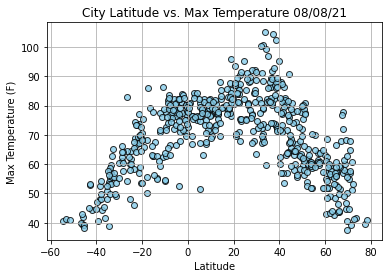

In [16]:
# Build scatter plot for latitude vs max temp
plt.subplots(facecolor="white")
plt.scatter(lats, max_temps, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig1.png")

plt.show()

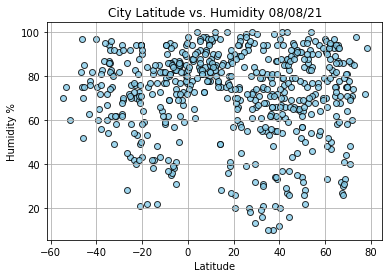

In [17]:
# Build scatter plot for latitude vs humidity
plt.subplots(facecolor="white")
plt.scatter(lats, humidity, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig2.png")

plt.show()

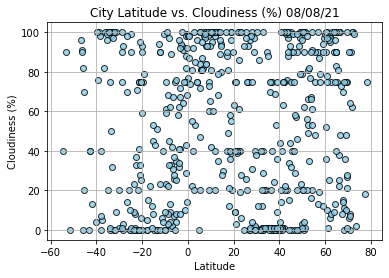

In [18]:
# Build scatter plot for latitude vs cloudiness
plt.subplots(facecolor="white")
plt.scatter(lats, cloudiness, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig3.png")

plt.show()

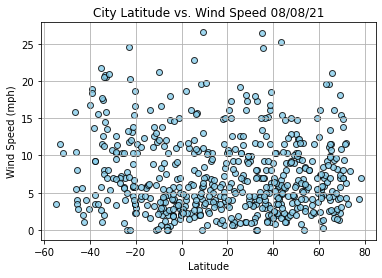

In [19]:
# Build scatter plot for latitude vs wind speed
plt.subplots(facecolor="white")
plt.scatter(lats, wind_speed, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig4.png")

plt.show()

In [22]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calc the regression line "y values" from slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames using .loc
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)] # northern hem have postive lat (i.e. 0 - 90)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] # southern hem have negative lat (i.e. -90 - 0)

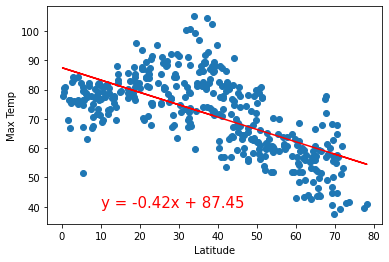

In [23]:
# Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

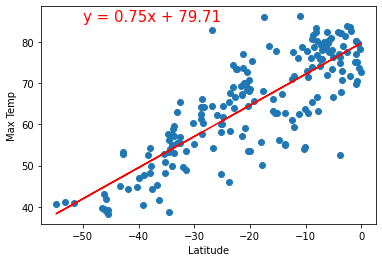

In [24]:
# Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

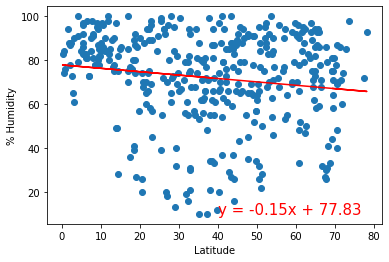

In [25]:
# Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

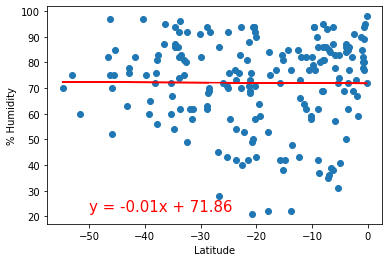

In [26]:
# Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,22))

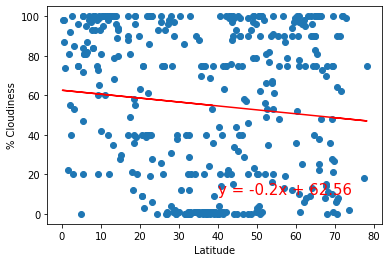

In [27]:
# Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(40,10))

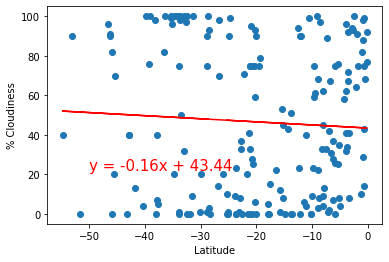

In [28]:
# Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,22))

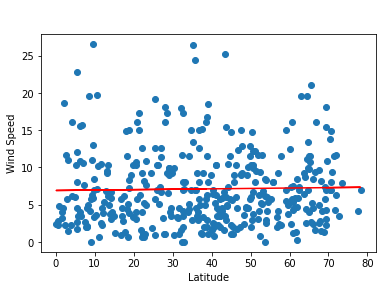

In [29]:
# Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,30))

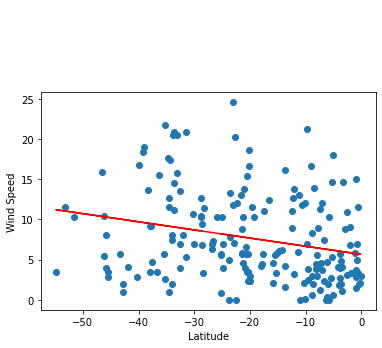

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))